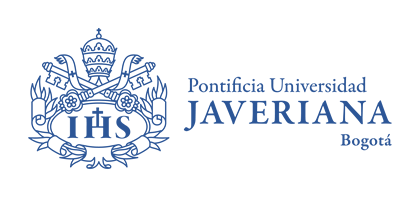

# Aprendizaje de Máquina - Redes neuronales artificiales
## Perceptrón y ADALINE
Este notebook tiene como objetivo familiarizar al estudiante con los modelos de redes neuronales básicos: Perceptrón y ADALINE. Se prueba el desempeño con 2 conjuntos de  datos: linealmente separables y no linealmente separables.


## Setup
Se instalan y se importan las librerías necesarias para el ejercicio

In [391]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn.datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression



In [392]:
sklearn.__version__

'1.3.1'

## Conjunto de datos - Generación de datos sintéticos

Inicialmente crearemos 2 conjuntos de datos sintéticos, uno linealmente separable y el otro no




In [393]:
N=300

In [394]:
# Creación del dataset aleatorio
X_ejemplo1 , y_true = make_blobs(n_samples=N, centers=2,
                       cluster_std=0.4, random_state=0)

In [395]:
# Intercambio X[0] y X[1]
X_ejemplo1 = X_ejemplo1[:, ::-1]

In [396]:
shuffler = np.random.permutation(len(y_true))
X_ejemplo1 = X_ejemplo1[shuffler]
y_true = y_true[shuffler]

In [397]:
X_ejemplo1

array([[ 0.54207512,  1.38278024],
       [ 0.75768631,  1.64329341],
       [ 0.80859362,  2.28218363],
       [ 4.33880782,  1.3560384 ],
       [ 1.10846534,  2.05871868],
       [ 4.03171605,  0.92900446],
       [ 1.41823489,  1.58360435],
       [ 4.519487  ,  0.66830365],
       [ 0.54129763,  2.16507406],
       [ 4.66620519,  1.72329366],
       [ 1.59473117,  2.16897939],
       [ 4.00692132,  1.32204456],
       [ 4.14740598,  0.71530665],
       [ 1.31685252,  2.25474363],
       [ 0.33090121,  1.8685293 ],
       [ 3.87181472,  1.42692445],
       [ 4.73563476,  1.4372027 ],
       [ 4.5577999 ,  1.04293948],
       [ 3.68587889,  0.57618394],
       [ 4.45854833,  0.61808345],
       [ 1.14580698,  1.8634052 ],
       [ 4.14307495,  1.04724054],
       [ 0.50613172,  1.8482599 ],
       [ 1.30943919,  2.3638299 ],
       [ 1.07803744,  1.35291129],
       [ 0.68188181,  1.24870487],
       [ 3.66296427,  1.22636266],
       [ 0.23497762,  2.07071974],
       [ 0.95448838,

In [398]:
y_true

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0])

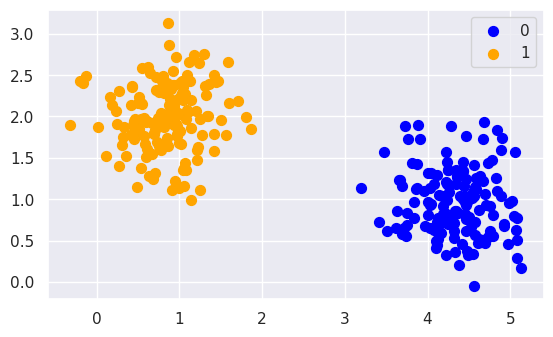

In [399]:
# Visualizamos los puntos

ax =  plt.gca()
ax.set_aspect('equal', adjustable='box')
for g, col in zip(np.unique(y_true),['blue','orange']):
    ix = np.where(y_true == g)
    ax.scatter(X_ejemplo1[ix,0], X_ejemplo1[ix,1], c = col, label = g, s = 50 )
#ax.scatter(X[:, 0], X[:, 1], s=50,  c=y_true, label=y_true,  cmap='viridis');
ax.legend()


## Generamos segundo dataset

In [400]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))),
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X_ejemplo2, y_true2 = twospirals(N)

In [401]:
shuffler = np.random.permutation(len(y_true2))
X_ejemplo2 = X_ejemplo2[shuffler]
y_true2 = y_true2[shuffler]

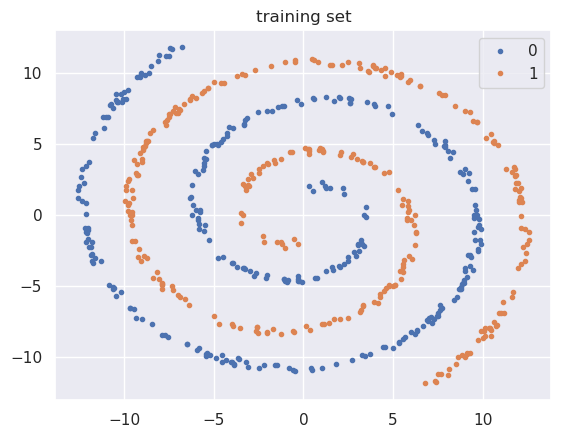

In [402]:
plt.title('training set')
plt.plot(X_ejemplo2[y_true2==0,0], X_ejemplo2[y_true2==0,1], '.', label=0)
plt.plot(X_ejemplo2[y_true2==1,0], X_ejemplo2[y_true2==1,1], '.', label=1)
plt.legend()
plt.show()

# Tareas:
* Dividir datasets train - test
* Crear perceptrón simple y probar su desempeño
* Crear ADALINE y probar su desempeño
* Probar ambos modelos con una regresión logística y probar su desempeño

In [403]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_ejemplo1, y_true, test_size=0.20, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_ejemplo2, y_true2, test_size=0.20, random_state=42)

In [404]:
X1_train.shape

(240, 2)

In [405]:
X1_test.shape

(60, 2)

##  1. Crear  perceptrón simple y probar su desempeño

El primer modelo a probar es un perceptron simple, complete las instrucciones que dicen TODO:

In [407]:
class Perceptron(object):

    def __init__(self, samples, labels, init_val = None):
        """
        Inicialización del perceptrón
        Parametros:
        samples -- Conjunto de entrenamiento
        labels -- Etiquetas
        init_val -- Pesos hipótesis inicial

        """
        ulabels = np.unique(labels)

        # se añade un 1 a los ejemplos (folding in)
        self.samples = np.insert(samples,0,np.ones(samples.shape[0]),axis=1)
        self.labels = labels
        # Inicialización aleatoria (en clase lo hicimos con 0's)
        if init_val is None:
            self.weights = np.random.rand(samples.shape[1] + 1)
        else:
            self.weights = np.full(samples.shape[1] + 1, float(init_val))
        pass

    def train(self, learning_rate = 0.01, iterations = 20):
        """
        Inicialización del perceptrón
        Parametros:
        learning_rate -- Paso del ajuste de hipótesis del perceptrón
        iterations -- Epocas

        """
        for i in range(iterations):
            errs = 0
            for sample, label, sample_id in zip(self.samples, self.labels, range(0,len(self.labels))):
                f = np.sign(np.dot(sample, self.weights))>0
                if f != label:
                  self.weights += learning_rate * (label - f) * sample

                  errs += 1
                  print(f'Error in iteration {i+1} sample id {sample_id}')
                  pass
            if errs == 0:
                print("Found a boundary in %d iterations." % (i + 1))
                return self
            pass
        print("Failed to find a boundary.")
        pass

    def predict(self, new_samples):
        """
        Función de predicción del perceptrón
        Parametros:
        new_samples -- X

        Returns:
          Labels para los new_samples
        """
        #Inserta 1 a los samples
        X = np.insert(new_samples,0,np.ones(new_samples.shape[0]),axis=1)
        predicts = np.sign(np.dot(X, self.weights)) > 0
        return predicts



In [409]:
p= Perceptron(X1_train,Y1_train)



In [410]:
p.train()


Error in iteration 1 sample id 0
Error in iteration 1 sample id 3
Error in iteration 1 sample id 5
Error in iteration 1 sample id 7
Error in iteration 1 sample id 9
Error in iteration 1 sample id 11
Error in iteration 1 sample id 13
Error in iteration 1 sample id 14
Error in iteration 1 sample id 15
Error in iteration 1 sample id 18
Error in iteration 1 sample id 22
Error in iteration 1 sample id 27
Error in iteration 1 sample id 28
Error in iteration 1 sample id 31
Error in iteration 1 sample id 32
Error in iteration 1 sample id 33
Error in iteration 1 sample id 34
Error in iteration 1 sample id 35
Error in iteration 1 sample id 60
Error in iteration 1 sample id 98
Found a boundary in 2 iterations.


In [411]:
p.predict(X1_test)

array([ True, False, False, False,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
        True,  True,  True,  True, False,  True])

In [412]:
Y1_test


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [413]:
y1_pred = p.predict(X1_test).astype(int)





# Compare utilizando las métricas precision y recall
https://scikit-learn.org/stable/modules/model_evaluation.html

In [414]:
print("Dataset 1:")
print("Accuracy :", accuracy_score(Y1_test, y1_pred))
print("Precision:", precision_score(Y1_test, y1_pred))
print("Recall   :", recall_score(Y1_test, y1_pred))
print("F1       :", f1_score(Y1_test, y1_pred))
print("Matriz de confusión:\n", confusion_matrix(Y1_test, y1_pred))


Dataset 1:
Accuracy : 0.9333333333333333
Precision: 0.8787878787878788
Recall   : 1.0
F1       : 0.9354838709677419
Matriz de confusión:
 [[27  4]
 [ 0 29]]


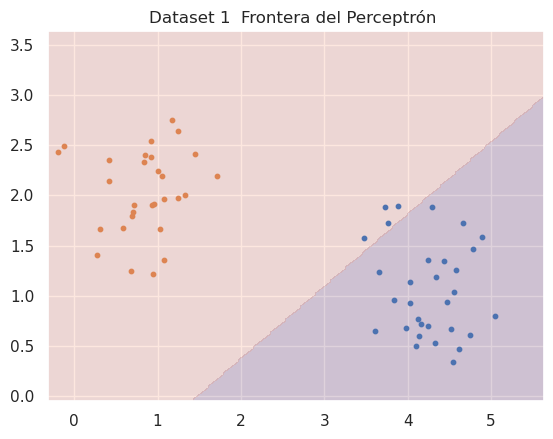

In [415]:
x_min, x_max = X1_train[:,0].min()+0, X1_train[:,0].max()+0.5
y_min, y_max = X1_train[:,1].min()+0, X1_train[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = p.predict(grid).reshape(xx.shape)

plt.figure()
plt.title("Dataset 1  Frontera del Perceptrón ")
plt.contourf(xx, yy, Z, alpha=0.2) 
plt.scatter(X1_test[Y1_test==0,0], X1_test[Y1_test==0,1], s=10)
plt.scatter(X1_test[Y1_test==1,0], X1_test[Y1_test==1,1], s=10)
plt.show()

In [416]:
p2= Perceptron(X2_train,Y2_train)

In [417]:
p2.train()



Error in iteration 1 sample id 0
Error in iteration 1 sample id 1
Error in iteration 1 sample id 2
Error in iteration 1 sample id 3
Error in iteration 1 sample id 4
Error in iteration 1 sample id 6
Error in iteration 1 sample id 11
Error in iteration 1 sample id 12
Error in iteration 1 sample id 14
Error in iteration 1 sample id 15
Error in iteration 1 sample id 16
Error in iteration 1 sample id 22
Error in iteration 1 sample id 24
Error in iteration 1 sample id 26
Error in iteration 1 sample id 27
Error in iteration 1 sample id 28
Error in iteration 1 sample id 29
Error in iteration 1 sample id 31
Error in iteration 1 sample id 33
Error in iteration 1 sample id 36
Error in iteration 1 sample id 38
Error in iteration 1 sample id 41
Error in iteration 1 sample id 43
Error in iteration 1 sample id 46
Error in iteration 1 sample id 47
Error in iteration 1 sample id 49
Error in iteration 1 sample id 51
Error in iteration 1 sample id 52
Error in iteration 1 sample id 53
Error in iteration 1

In [418]:
p.predict(X2_test)

array([ True,  True, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False])

In [419]:
y2_pred = p.predict(X2_test).astype(int)

In [420]:
print("Dataset 2:")
print("Accuracy :", accuracy_score(Y2_test, y2_pred))
print("Precision:", precision_score(Y2_test, y2_pred))
print("Recall   :", recall_score(Y2_test, y2_pred))
print("Matriz de confusión:\n", confusion_matrix(Y2_test, y2_pred))

Dataset 2:
Accuracy : 0.5166666666666667
Precision: 0.515625
Recall   : 0.55
Matriz de confusión:
 [[29 31]
 [27 33]]


# 2. Crear modelo ADALINE

El segundo modelo a crear es el modelo ADALINE, complete el siguiente esquema completando las instrucciones TODO:

In [421]:
class ADALINE(object):

    def __init__(self, samples, labels, init_val = None):
        """
        Inicialización de modelo ADALINE
        Parametros:
        samples -- Conjunto de entrenamiento
        labels -- Etiquetas
        init_val -- Pesos hipótesis inicial

        """
        ulabels = np.unique(labels)

        # se añade un 1 a los ejemplos (folding in)
        self.samples = np.insert(samples,0,np.ones(samples.shape[0]),axis=1)
        self.labels = labels
        if init_val is None:
            self.weights = np.random.rand(samples.shape[1] + 1)
        else:
            self.weights = np.full(samples.shape[1] + 1, float(init_val))
        pass

    def train(self, learning_rate = 0.01, iterations = 20):
        """
        Inicialización del perceptrón
        Parametros:
        learning_rate -- Paso del ajuste de hipótesis del perceptrón
        iterations -- Epocas

        """
        for i in range(iterations):
            errs = 0
            for sample, label, sample_id in zip(self.samples, self.labels, range(0,len(self.labels))):
                output = np.dot(sample, self.weights)
                error = label - output
                self.weights += learning_rate * error * sample 
                if (label - (output >= 0)) != 0:
                  errs += 1
                  print(f'Error in iteration {i+1} sample id {sample_id}')
                  pass
            if errs == 0:
                print("Found a boundary in %d iterations." % (i + 1))
                return self
            pass
        print("Failed to find a boundary.")
        pass

    def predict(self, new_samples):
        """
        Función de predicción del perceptrón
        Parametros:
        new_samples -- X

        Returns:
          Labels para los new_samples
        """
        #Inserta 1 a los samples
        X = np.insert(new_samples,0,np.ones(new_samples.shape[0]),axis=1)
        # Recuerde usar los thresholds para las clases
        predicts = np.where(np.dot(X, self.weights) >= 0.0, 1, 0)

        return predicts

In [422]:
a1= ADALINE(X1_train,Y1_train)


In [423]:
a1.train()

Error in iteration 1 sample id 0
Error in iteration 1 sample id 3
Error in iteration 1 sample id 5
Error in iteration 1 sample id 7
Error in iteration 1 sample id 9
Error in iteration 1 sample id 11
Error in iteration 1 sample id 13
Error in iteration 1 sample id 18
Error in iteration 1 sample id 28
Error in iteration 1 sample id 31
Error in iteration 1 sample id 32
Error in iteration 1 sample id 33
Error in iteration 1 sample id 34
Error in iteration 1 sample id 35
Error in iteration 1 sample id 38
Error in iteration 1 sample id 40
Error in iteration 1 sample id 49
Error in iteration 1 sample id 51
Error in iteration 1 sample id 52
Error in iteration 1 sample id 59
Error in iteration 1 sample id 60
Error in iteration 1 sample id 62
Error in iteration 1 sample id 67
Error in iteration 1 sample id 69
Error in iteration 1 sample id 71
Error in iteration 1 sample id 75
Error in iteration 1 sample id 89
Error in iteration 1 sample id 91
Error in iteration 1 sample id 93
Error in iteration 

In [424]:
a1.predict(X1_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [426]:
Y1_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

Compare utilizando las métricas precision y recall
https://scikit-learn.org/stable/modules/model_evaluation.html

In [429]:
y1_pred_ad = a1.predict(X1_test).astype(int)

print("\n[ADALINE] Dataset 1 :")
print("Accuracy :", round(accuracy_score(Y1_test, y1_pred_ad), 4))
print("Precision:", round(precision_score(Y1_test, y1_pred_ad), 4))
print("Recall   :", round(recall_score(Y1_test, y1_pred_ad), 4))
print("F1       :", round(f1_score(Y1_test, y1_pred_ad),4))
print("Matriz de confusión:\n", confusion_matrix(Y1_test, y1_pred_ad))




[ADALINE] Dataset 1 :
Accuracy : 0.6
Precision: 0.5472
Recall   : 1.0
F1       : 0.7073
Matriz de confusión:
 [[ 7 24]
 [ 0 29]]


In [388]:
a2= ADALINE(X2_train,Y2_train)

In [389]:
a2.train()

Error in iteration 1 sample id 0
Error in iteration 1 sample id 2
Error in iteration 1 sample id 3
Error in iteration 1 sample id 4
Error in iteration 1 sample id 8
Error in iteration 1 sample id 10
Error in iteration 1 sample id 12
Error in iteration 1 sample id 13
Error in iteration 1 sample id 14
Error in iteration 1 sample id 15
Error in iteration 1 sample id 17
Error in iteration 1 sample id 18
Error in iteration 1 sample id 20
Error in iteration 1 sample id 21
Error in iteration 1 sample id 25
Error in iteration 1 sample id 26
Error in iteration 1 sample id 31
Error in iteration 1 sample id 35
Error in iteration 1 sample id 38
Error in iteration 1 sample id 40
Error in iteration 1 sample id 41
Error in iteration 1 sample id 48
Error in iteration 1 sample id 49
Error in iteration 1 sample id 50
Error in iteration 1 sample id 51
Error in iteration 1 sample id 57
Error in iteration 1 sample id 59
Error in iteration 1 sample id 62
Error in iteration 1 sample id 67
Error in iteration 

In [351]:
a2.predict(X2_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [352]:
Y2_test

array([1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1.])

In [390]:
y2_pred_ad = a2.predict(X2_test).astype(int)

print("\n[ADALINE] Dataset 2 :")
print("Accuracy :", accuracy_score(Y2_test, y2_pred_ad))
print("Precision:", precision_score(Y2_test, y2_pred_ad))
print("Recall   :", recall_score(Y2_test, y2_pred_ad))
print("F1       :", f1_score(Y2_test, y2_pred_ad))
print("Matriz de confusión:\n", confusion_matrix(Y2_test, y2_pred_ad))


[ADALINE] Dataset 2 :
Accuracy : 0.55
Precision: 0.55
Recall   : 1.0
F1       : 0.7096774193548387
Matriz de confusión:
 [[ 0 54]
 [ 0 66]]


##  3. Crear modelo de regresión logística y probar desempeño

Inicialice un modelo de regresión logística usando scikit-learn y compare contra el modelo de perceptrón y ADALINE con ambos datasets.

[LogReg] Dataset 1
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1       : 1.0
Matriz de confusión:
 [[25  0]
 [ 0 35]]
---------------------------------------------------------------------

[LogReg] Dataset 2
Accuracy : 0.5083
Precision: 0.5192
Recall   : 0.4426
F1       : 0.4779
Matriz de confusión:
 [[34 25]
 [34 27]]


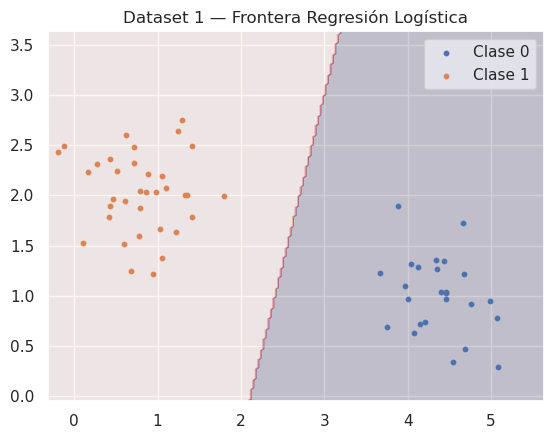

In [354]:
lr1 = LogisticRegression(random_state=0, max_iter=1000)
lr1.fit(X1_train, Y1_train)
y1_pred_lr = lr1.predict(X1_test)

print("[LogReg] Dataset 1")
print("Accuracy :", round(accuracy_score(Y1_test, y1_pred_lr), 4))
print("Precision:", round(precision_score(Y1_test, y1_pred_lr), 4))
print("Recall   :", round(recall_score(Y1_test, y1_pred_lr), 4))
print("F1       :", round(f1_score(Y1_test, y1_pred_lr), 4))
print("Matriz de confusión:\n", confusion_matrix(Y1_test, y1_pred_lr))

print("---------------------------------------------------------------------")

# Dataset 2 (two spirals, no lineal)
lr2 = LogisticRegression(random_state=0, max_iter=2000)
lr2.fit(X2_train, Y2_train)
y2_pred_lr = lr2.predict(X2_test)

print("\n[LogReg] Dataset 2")
print("Accuracy :", round(accuracy_score(Y2_test, y2_pred_lr), 4))
print("Precision:", round(precision_score(Y2_test, y2_pred_lr), 4))
print("Recall   :", round(recall_score(Y2_test, y2_pred_lr), 4))
print("F1       :", round(f1_score(Y2_test, y2_pred_lr), 4))
print("Matriz de confusión:\n", confusion_matrix(Y2_test, y2_pred_lr))

# Rango de los ejes
x_min, x_max = X1_train[:,0].min()+0, X1_train[:,0].max()+0.5
y_min, y_max = X1_train[:,1].min()+0, X1_train[:,1].max()+0.5

# Malla
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# Predicciones de la regresión logística en la malla
Z = lr1.predict(grid).reshape(xx.shape)

# Gráfico
plt.figure()
plt.title("Dataset 1 — Frontera Regresión Logística")
plt.contourf(xx, yy, Z, alpha=0.2) 
plt.scatter(X1_test[Y1_test==0,0], X1_test[Y1_test==0,1], s=10, label="Clase 0")
plt.scatter(X1_test[Y1_test==1,0], X1_test[Y1_test==1,1], s=10, label="Clase 1")
plt.legend()
plt.show()
